In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install Library

In [2]:
# !pip install --upgrade parameter-sherpa --proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade numpy --proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade pandas --proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade openpyxl --proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade matplotlib --proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade seaborn --proxy proxy1.bri.co.id:1707
!pip3 install --upgrade statsmodels #--proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade missingno --proxy proxy1.bri.co.id:1707
!pip3 install --upgrade grplot #--proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade lightgbm --proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade xgboost --proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade catboost --proxy proxy1.bri.co.id:1707
!pip3 install scikit-learn==0.24.2 #--proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade scikit-learn --proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade scikit-learn-extra --proxy proxy1.bri.co.id:1707
!pip3 install imblearn==0.7 #--proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade imblearn --proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade shap --proxy proxy1.bri.co.id:1707
# !pip3 install yellowbrick==1.4 --proxy proxy1.bri.co.id:1707
!pip3 install --upgrade optbinning #--proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade zipp --proxy proxy1.bri.co.id:1707
!pip3 install --upgrade pyjanitor #--proxy proxy1.bri.co.id:1707
# !pip3 install --upgrade tensorflow --proxy proxy1.bri.co.id:1707
# !jupyter contrib nbextension install --user
# !jupyter nbextension enable toc2/main
# !pip install yfinance
# !pip install feature-engine
# !pip install pmdarima
!pip install scipy
!pip install pystan==2.19.1.1
!pip install fbprophet
!pip install neuralprophet
!pip install torch-summary
!pip install torchviz
!pip install livelossplot
!pip install transformers
!pip install emoji
!pip install nltk
!pip install tweet-preprocessor
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement imblearn==0.7 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://u

# Define Path

In [3]:
BASE_PATH = "/content/drive/MyDrive/Dev Winner TSDN 2022/Sentiment/"
IMAGE_PATH = BASE_PATH + "images/"
DATA_PATH = BASE_PATH + "data/"
MODEL_PATH = BASE_PATH + "models/"
MODULE_PATH = BASE_PATH + "modules/"

# Import Library and Helper Function

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd
# import janitor

pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [6]:
def info(df):
    def types(s):
        return s.dtypes
    def unique_nan(s):
        return s.nunique(dropna=False)
    def count_nulls(s):
        return s.size - s.count()
    def null_percentage(s):
        return round(((s.size - s.count()) * 100 / s.size), 2)
    output = df.agg([types, 'count', 'nunique', 'size', unique_nan, count_nulls, null_percentage, 'unique']).transpose()
    output.reset_index(inplace=True)
    output.columns = ['Kolom', 'Tipe Data', 'Jumlah Baris', 'Jumlah Unik', 'Total Baris', 'Jumlah Unik + NAN', 'Jumlah Missing Value', 'Persentase Missing Value', 'Unik']
    output['Deskripsi'] = [name.replace("_"," ").title() for name in output['Kolom']]
    output = output[['Kolom', 'Deskripsi', 'Tipe Data', 'Jumlah Baris', 'Jumlah Unik', 'Total Baris', 'Jumlah Unik + NAN', 'Jumlah Missing Value', 'Persentase Missing Value', 'Unik']]
    return output

def describe(df):
    output = df.describe().transpose()
    output.columns = ['Kolom', 'Jumlah Baris', 'Rata-rata', 'Nilai Minimum', '25%', '50%', '75%', 'Nilai Maksimum']
    return output

def missing_value(df):
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    missing_value = pd.DataFrame({'column':df.columns,'percent_missing':percent_missing})
    missing_value = missing_value[missing_value['percent_missing']>0]
    missing_value = missing_value.sort_values('percent_missing', ascending=False)
    return missing_value

In [7]:
from grplot import plot2d, analytic
import grplot_seaborn as gs
gs.set_theme(context='notebook', style='darkgrid', palette='deep')
import matplotlib
matplotlib.rcParams['axes.formatter.limits'] = [-5,18]
import matplotlib.pyplot as plt

In [8]:
# import optbinning
import joblib

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [10]:
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

layout = go.Layout(paper_bgcolor='rgba(255,255,2555,0.5)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'

In [11]:
import re, string
import emoji
import nltk
import preprocessor as p
import random

In [12]:
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel
import torch
import tensorflow as tf
import tensorflow_addons
from tensorflow import keras
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Pendahuluan Dataset

In [13]:
df = pd.read_csv(DATA_PATH + "indihome.csv", parse_dates=['date'], index_col=0)

In [14]:
df.head()

,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,sentiment,topic
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1590337331802050561,1590337331802050561,2022-11-09 20:35:41 WIB,2022-11-09,20:35:41,700,470157855,kupu2_songkang,SK🦋,NaN,"@IndiHomeCare kak kan saya pake paket indihome wifi doang, mau di upgrade ke yg plus TV yg paket 2P 30 MBPS (internet+TV) itu biaya pemasangannya berapa y?",in,[],[],[],0,0,0,[],[],https://twitter.com/kupu2_songkang/status/1590337331802050561,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,1.0,NaN
1590337215426490369,1590333926203351042,2022-11-09 20:35:13 WIB,2022-11-09,20:35:13,700,765035200896118789,indihomecare,IndiHomeCare,NaN,"@bowlbasawr Halo, Sobat. Caranya bisa melalui kami, boleh disampaikan alasan berhenti berlangganan karena apa? Selain itu bisa infokan juga data-data berikut: 1. Nomor IndiHome 2. Atas nama pemilik IndiHome 3. Alamat lengkap (beserta patokan lokasi/ ancer-ancer) 4. Nama pemohon",in,[],[],[],0,0,0,[],[],https://twitter.com/IndiHomeCare/status/1590337215426490369,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'bowlbasawr', 'name': 'Pokémon Hijau', 'id': '1544050951564058624'}]",NaN,NaN,NaN,NaN,1.0,NaN
1590337197223604226,1590337197223604226,2022-11-09 20:35:09 WIB,2022-11-09,20:35:09,700,1469167288662167553,ettyrastika,Etty Rastika,NaN,Nonton Manchester United ada Ronaldo. Main sendiri tanpa kesebelasan. Ayo tambah layanan indihome~nya selagi ada promo. Sebelum waktu promo kehabisan🫶🏻 #AktivitasTanpaBatas #InternetnyaIndonesia #PantunKalsel https://t.co/X61Khra5H7,in,[],[],[],0,0,0,"['aktivitastanpabatas', 'internetnyaindonesia', 'pantunkalsel']",[],https://twitter.com/EttyRastika/status/1590337197223604226,False,NaN,2,https://pbs.twimg.com/ext_tw_video_thumb/1590337132094058496/pu/img/m310h0ikJ7oRRpHi.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,1.0,NaN
1590337009247473664,1590337009247473664,2022-11-09 20:34:24 WIB,2022-11-09,20:34:24,700,1514838822672306176,afdallfc,Afdallfc,NaN,Biar tampilannya full mending Pake laptop dl cek2 barang pesanan &amp; paketku.. untung sdh pake Indihome jg jd bisa maksimal koneksinya.👍 https://t.co/FCopyFPfn5,in,[],[],[],0,0,0,[],[],https://twitter.com/afdallfc/status/1590337009247473664,False,NaN,2,https://pbs.twimg.com/ext_tw_video_thumb/1590336939089350657/pu/img/F_lLvaTx8K5yJ9Pr.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2.0,NaN
1590336841076846598,1590336841076846598,2022-11-09 20:33:44 WIB,2022-11-09,20:33:44,700,1242668044041613318,namakuanya,🤍,NaN,"Nonton mukbang nasi padang pake internet IndiHome bikin laperrr, apalagi yang di makan menu favorit ku banget rendang jadi ngilerr😋",in,[],[],[],0,0,0,[],[],https://twitter.com/namakuanya/status/1590336841076846598,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2.0,NaN


# Exploratory Data Analysis: Finding Descriptive Insight

In [15]:
df_info = info(df)
df_info

,Kolom,Deskripsi,Tipe Data,Jumlah Baris,Jumlah Unik,Total Baris,Jumlah Unik + NAN,Jumlah Missing Value,Persentase Missing Value,Unik
0,conversation_id,Conversation Id,int64,1004,765,1004,765,0,0.0,"[1590337331802050561, 1590333926203351042, 1590337197223604226, 1590337009247473664, 1590336841076846598, 1590336820117921794, 1590226430725484544, 1590336510095929347, 1590336506165886977, 1590336242100883457, 1590262357527531520, 1590176129729449984, 1590335775518134274, 1590335146892591104, 1590293933791535115, 1590335396525015042, 1590331319179169794, 1590335117549240320, 1590335038662451201, 1590335027958906880, 1590226213628694528, 1590334738908450819, 1590334514567729154, 159033450302..."
1,created_at,Created At,object,1004,992,1004,992,0,0.0,"[2022-11-09 20:35:41 WIB, 2022-11-09 20:35:13 WIB, 2022-11-09 20:35:09 WIB, 2022-11-09 20:34:24 WIB, 2022-11-09 20:33:44 WIB, 2022-11-09 20:33:39 WIB, 2022-11-09 20:33:08 WIB, 2022-11-09 20:32:25 WIB, 2022-11-09 20:32:24 WIB, 2022-11-09 20:31:21 WIB, 2022-11-09 20:30:56 WIB, 2022-11-09 20:30:41 WIB, 2022-11-09 20:29:30 WIB, 2022-11-09 20:29:25 WIB, 2022-11-09 20:29:16 WIB, 2022-11-09 20:28:00 WIB, 2022-11-09 20:27:25 WIB, 2022-11-09 20:27:00 WIB, 2022-11-09 20:26:53 WIB, 2022-11-09 20:26:34 ..."
2,date,Date,datetime64[ns],1004,1,1004,1,0,0.0,[2022-11-09T00:00:00.000000000]
3,time,Time,object,1004,992,1004,992,0,0.0,"[20:35:41, 20:35:13, 20:35:09, 20:34:24, 20:33:44, 20:33:39, 20:33:08, 20:32:25, 20:32:24, 20:31:21, 20:30:56, 20:30:41, 20:29:30, 20:29:25, 20:29:16, 20:28:00, 20:27:25, 20:27:00, 20:26:53, 20:26:34, 20:26:32, 20:25:43, 20:25:23, 20:24:29, 20:24:27, 20:23:44, 20:22:09, 20:21:25, 20:21:22, 20:21:07, 20:21:01, 20:18:22, 20:18:19, 20:17:35, 20:17:13, 20:17:01, 20:16:40, 20:16:16, 20:16:04, 20:15:41, 20:15:36, 20:14:06, 20:13:34, 20:13:09, 20:13:06, 20:12:52, 20:11:48, 20:10:21, 20:09:24, 20:08..."
4,timezone,Timezone,int64,1004,1,1004,1,0,0.0,[700]
5,user_id,User Id,object,1004,630,1004,630,0,0.0,"[470157855, 765035200896118789, 1469167288662167553, 1514838822672306176, 1242668044041613318, 1232311683328040960, 1569236483336458240, 1405053860511555587, 1566410144371871749, 1062100734, 937939436322435072, 1082975374554804224, 1150034478665912325, 1567398501751078913, 1494187548280647681, 1121048399170523142, 1206496037579309056, 1617747960, 1418466089436995587, 3227309822, 958281733052379136, 1544050951564058624, 85259259, 1467793565648502786, 1547640782789935104, 247297725, 1113023321..."
6,username,Username,object,1004,630,1004,630,0,0.0,"[kupu2_songkang, indihomecare, ettyrastika, afdallfc, namakuanya, syafiqmughnimar, suhartono44, nurhasan2075, ihdaku2, sasadanisha, vrataski_cv, docy_devil, kimmkimq, farthurrosi, cherysrie2, tkwibu, zjackki, rizkynatalia00, novrizal871, bimz_neptune, poohunny13, bowlbasawr, sambayon, jepong__, sulum710, adi_lfw, jokowipemuja, mastahta, tertawasendiri, vicryf, atidian1, cprz__, iocaiemogf, glossyechaaaaaa, handonorian, jklhlgn, justaufikajip, kinosukina, sani15286236, ohoreoooo, dpa_junior_1..."
7,name,Name,object,1003,628,1004,629,1,0.1,"[SK🦋, IndiHomeCare, Etty Rastika, Afdallfc, 🤍, ga punya duit, suhartono, Nurhasan, Ihdaku, Lycheee🧚‍♀️, atmonly, Docy x_x⚔️, Panitia Makrab, farthur rosi, chery_sriee, TkR, Jekk, Kejuu Lumer, Novrizal87, biMz Neptune, Yongki Poohˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ⃢ˈ, Pokémon Hijau, 🇹🇷🇵🇸🇲🇨 sambayon 🇲🇨🇵🇸🇹🇷, Jeri Pongsibidang, Sams, salah server, IntelPerubahan 🥤, Capt, Whatever People Say I Am, That's What I'm Not, vicryf, Atidian1, tinoadiwicaksono, ‎ ‎ ‎ ‎ ‎ ‎alin ‎ ‎ ‎, Cha ♡⁎⁺˳✧, Rian ha..."
8,place,Place,float64,0,0,1004,1,1004,100.0,[nan]
9,tweet,Tweet,object,1004,994,1004,994,0,0.0,"[@IndiHomeCare kak kan saya pake paket indihome wifi doang, mau di upgrade ke yg plus TV yg paket 2P 30 MBPS (internet+TV) itu biaya pemasangannya berapa y?, @bowlbasawr Halo, Sobat. Caranya bisa melalui kami, boleh disampaikan alasan berhenti berlangganan karena apa? Selain itu bisa infokan juga data-data berikut: 1. Nom

In [16]:
df_info.to_excel(DATA_PATH + "info_dataset.xlsx")

In [17]:
statistika_dataset = describe(df)
statistika_dataset

,Kolom,Jumlah Baris,Rata-rata,Nilai Minimum,25%,50%,75%,Nilai Maksimum
conversation_id,1004.0,1.589380e+18,1.556927e+16,1.210707e+18,1.590167e+18,1.590226e+18,1.590291e+18,1.590337e+18
timezone,1004.0,7.000000e+02,0.000000e+00,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02
place,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
replies_count,1004.0,1.031873e+00,5.129332e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,9.800000e+01
retweets_count,1004.0,2.848606e-01,2.852738e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.100000e+01
likes_count,1004.0,6.683267e-01,5.294945e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.110000e+02
video,1004.0,6.832669e-01,9.489874e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00
near,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
statistika_dataset.to_excel(DATA_PATH + "statistika_dataset.xlsx")

## Drop Unused Feature for EDA

In [19]:
df.columns

Index(['conversation_id', 'created_at', 'date', 'time', 'timezone', 'user_id',
       'username', 'name', 'place', 'tweet', 'language', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'thumbnail',
       'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id',
       'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest',
       'sentiment', 'topic'],
      dtype='object')

In [20]:
df_eda = df[['date', 'tweet', 'sentiment']].copy(deep=True)

In [21]:
df_eda['label_sentiment'] = df_eda['sentiment'].map({0:'Negatif', 1:'Netral', 2:'Positif'})

## Feature Data Type

In [22]:
num_column = df_eda.select_dtypes('number').columns
numerical = ['Count', 'count', 'Frequency', 'Probability', 'Proportion', 'Percent', 'Density']
num_column

Index(['sentiment'], dtype='object')

In [23]:
cat_column = df_eda.select_dtypes('object').columns
cat_column

Index(['tweet', 'label_sentiment'], dtype='object')

In [24]:
dt_column = df_eda.select_dtypes('datetime').columns
# dt_column = ['Date']
dt_column

Index(['date'], dtype='object')

## Univariate Analysis

In [25]:
df_eda.head()

,date,tweet,sentiment,label_sentiment
id,,,,
1590337331802050561,2022-11-09,"@IndiHomeCare kak kan saya pake paket indihome wifi doang, mau di upgrade ke yg plus TV yg paket 2P 30 MBPS (internet+TV) itu biaya pemasangannya berapa y?",1.0,Netral
1590337215426490369,2022-11-09,"@bowlbasawr Halo, Sobat. Caranya bisa melalui kami, boleh disampaikan alasan berhenti berlangganan karena apa? Selain itu bisa infokan juga data-data berikut: 1. Nomor IndiHome 2. Atas nama pemilik IndiHome 3. Alamat lengkap (beserta patokan lokasi/ ancer-ancer) 4. Nama pemohon",1.0,Netral
1590337197223604226,2022-11-09,Nonton Manchester United ada Ronaldo. Main sendiri tanpa kesebelasan. Ayo tambah layanan indihome~nya selagi ada promo. Sebelum waktu promo kehabisan🫶🏻 #AktivitasTanpaBatas #InternetnyaIndonesia #PantunKalsel https://t.co/X61Khra5H7,1.0,Netral
1590337009247473664,2022-11-09,Biar tampilannya full mending Pake laptop dl cek2 barang pesanan &amp; paketku.. untung sdh pake Indihome jg jd bisa maksimal koneksinya.👍 https://t.co/FCopyFPfn5,2.0,Positif
1590336841076846598,2022-11-09,"Nonton mukbang nasi padang pake internet IndiHome bikin laperrr, apalagi yang di makan menu favorit ku banget rendang jadi ngilerr😋",2.0,Positif


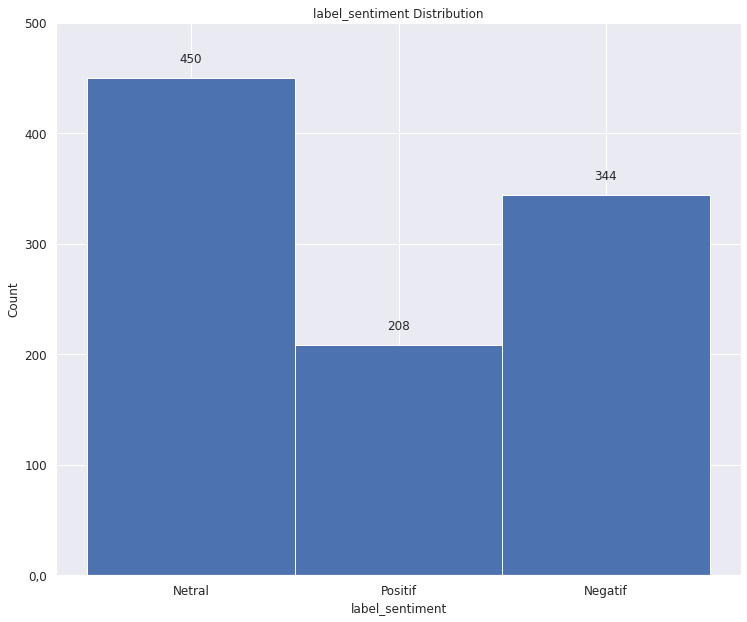

In [26]:
ax = plot2d(plot='histplot',
            df=df_eda,
            x='label_sentiment',
            y=None,
            Nx=1,
            Ny=1,
            figsize=[12,10],
            fontsize=12,
            sep={'.L':numerical},
            ytext='h',
            title='label_sentiment Distribution'
            )

Tergolong kasus imbalance

# EDA: Data Preparation

In [27]:
df_prep = df[['date', 'tweet', 'sentiment']].copy(deep=True)

In [28]:
df_prep.head()

,date,tweet,sentiment
id,,,
1590337331802050561,2022-11-09,"@IndiHomeCare kak kan saya pake paket indihome wifi doang, mau di upgrade ke yg plus TV yg paket 2P 30 MBPS (internet+TV) itu biaya pemasangannya berapa y?",1.0
1590337215426490369,2022-11-09,"@bowlbasawr Halo, Sobat. Caranya bisa melalui kami, boleh disampaikan alasan berhenti berlangganan karena apa? Selain itu bisa infokan juga data-data berikut: 1. Nomor IndiHome 2. Atas nama pemilik IndiHome 3. Alamat lengkap (beserta patokan lokasi/ ancer-ancer) 4. Nama pemohon",1.0
1590337197223604226,2022-11-09,Nonton Manchester United ada Ronaldo. Main sendiri tanpa kesebelasan. Ayo tambah layanan indihome~nya selagi ada promo. Sebelum waktu promo kehabisan🫶🏻 #AktivitasTanpaBatas #InternetnyaIndonesia #PantunKalsel https://t.co/X61Khra5H7,1.0
1590337009247473664,2022-11-09,Biar tampilannya full mending Pake laptop dl cek2 barang pesanan &amp; paketku.. untung sdh pake Indihome jg jd bisa maksimal koneksinya.👍 https://t.co/FCopyFPfn5,2.0
1590336841076846598,2022-11-09,"Nonton mukbang nasi padang pake internet IndiHome bikin laperrr, apalagi yang di makan menu favorit ku banget rendang jadi ngilerr😋",2.0


## Drop Duplicate

In [29]:
df_drop_duplicate = df_prep.copy(deep=True)

In [30]:
duplicate = df_prep.duplicated().sum()
print("Jumlah duplikat: ", duplicate)

Jumlah duplikat:  7


In [31]:
show_duplicate = df_prep.loc[df_prep.duplicated(keep=False),:]
show_duplicate.head()

,date,tweet,sentiment
id,,,
1590336841076846598,2022-11-09,"Nonton mukbang nasi padang pake internet IndiHome bikin laperrr, apalagi yang di makan menu favorit ku banget rendang jadi ngilerr😋",2.0
1590336820117921794,2022-11-09,"Pulang kerja masih harus siapin makan malam buat keluarga. Dan terkadang pernah gatau mau masak apa lagi. Untungnya youtube banyak referensi resep masakan enak, tinggal nonton tutorial masak pake Internet IndiHome masak makan malam beres 😍",2.0
1590275122463936513,2022-11-09,"Nonton mukbang nasi padang pake internet IndiHome bikin laperrr, apalagi yang di makan menu favorit ku banget rendang jadi ngilerr😋",2.0
1590275119263649793,2022-11-09,"Pulang kerja masih harus siapin makan malam buat keluarga. Dan terkadang pernah gatau mau masak apa lagi. Untungnya youtube banyak referensi resep masakan enak, tinggal nonton tutorial masak pake Internet IndiHome masak makan malam beres 😍",2.0
1590225953682509829,2022-11-09,"Pulang kerja masih harus siapin makan malam buat keluarga. Dan terkadang pernah gatau mau masak apa lagi. Untungnya youtube banyak referensi resep masakan enak, tinggal nonton tutorial masak pake Internet IndiHome masak makan malam beres 😍",2.0


In [32]:
df_drop_duplicate = df_drop_duplicate.drop_duplicates(keep='first')
df_drop_duplicate.shape

(997, 3)

In [33]:
df_drop_duplicate.to_csv(DATA_PATH + 'df_drop_duplicate.csv')

In [34]:
df_drop_duplicate = pd.read_csv(DATA_PATH + 'df_drop_duplicate.csv', parse_dates=['date'], index_col=0)

## Feature Data Type

In [35]:
num_column = df_drop_duplicate.select_dtypes('number').columns
numerical = ['Count', 'count', 'Frequency', 'Probability', 'Proportion', 'Percent', 'Density']
num_column

Index(['sentiment'], dtype='object')

In [36]:
cat_column = df_drop_duplicate.select_dtypes('object').columns
cat_column

Index(['tweet'], dtype='object')

In [37]:
dt_column = df_drop_duplicate.select_dtypes('datetime').columns
dt_column

Index(['date'], dtype='object')

## Missing Value Handling

In [38]:
df_imputed = df_drop_duplicate.copy(deep=True)

In [39]:
missing_value(df_imputed)

,column,percent_missing
sentiment,sentiment,0.2


### Drop Missing Label

In [40]:
df_imputed  = df_imputed.dropna()

In [41]:
missing_value(df_imputed)

,column,percent_missing


In [42]:
df_imputed.to_csv(DATA_PATH + 'df_imputed.csv')

In [43]:
df_imputed = pd.read_csv(DATA_PATH + 'df_imputed.csv', parse_dates=['date'], index_col=0)

In [44]:
df_imputed.head()

,date,tweet,sentiment
id,,,
1590337331802050561,2022-11-09,"@IndiHomeCare kak kan saya pake paket indihome wifi doang, mau di upgrade ke yg plus TV yg paket 2P 30 MBPS (internet+TV) itu biaya pemasangannya berapa y?",1.0
1590337215426490369,2022-11-09,"@bowlbasawr Halo, Sobat. Caranya bisa melalui kami, boleh disampaikan alasan berhenti berlangganan karena apa? Selain itu bisa infokan juga data-data berikut: 1. Nomor IndiHome 2. Atas nama pemilik IndiHome 3. Alamat lengkap (beserta patokan lokasi/ ancer-ancer) 4. Nama pemohon",1.0
1590337197223604226,2022-11-09,Nonton Manchester United ada Ronaldo. Main sendiri tanpa kesebelasan. Ayo tambah layanan indihome~nya selagi ada promo. Sebelum waktu promo kehabisan🫶🏻 #AktivitasTanpaBatas #InternetnyaIndonesia #PantunKalsel https://t.co/X61Khra5H7,1.0
1590337009247473664,2022-11-09,Biar tampilannya full mending Pake laptop dl cek2 barang pesanan &amp; paketku.. untung sdh pake Indihome jg jd bisa maksimal koneksinya.👍 https://t.co/FCopyFPfn5,2.0
1590336841076846598,2022-11-09,"Nonton mukbang nasi padang pake internet IndiHome bikin laperrr, apalagi yang di makan menu favorit ku banget rendang jadi ngilerr😋",2.0


## Cleaning

In [45]:
df_cleaning = df_imputed.copy(deep=True)

In [50]:
def preprocess_tweet(text):
    return p.clean(text)

stop_words = open(DATA_PATH + "stopword.txt", "r").read().split()

def clean_text(text, stopwords):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = str(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\r', ' ', text)
    text = ' '.join([word for word in text.split() if word.lower() not in stopwords])
    return text

dic = pd.read_csv(DATA_PATH + "normalize_word.csv")

def normalize(text):
    text = text.split()
    for val in dic.itertuples(index=False):
        text = [w.replace(val.slang, val.formal) if w == val.slang else w for w in text]
    return " ".join(text)

In [51]:
df_cleaning['tweet_clean'] = df_cleaning['tweet'].apply(preprocess_tweet)

In [52]:
df_cleaning['tweet_clean'] = df_cleaning['tweet_clean'].apply(clean_text, stopwords=stop_words)

In [53]:
df_cleaning['tweet_clean'] = df_cleaning['tweet_clean'].apply(normalize)

In [54]:
df_cleaning.head()

,date,tweet,sentiment,tweet_clean
id,,,,
1590337331802050561,2022-11-09,"@IndiHomeCare kak kan saya pake paket indihome wifi doang, mau di upgrade ke yg plus TV yg paket 2P 30 MBPS (internet+TV) itu biaya pemasangannya berapa y?",1.0,kak pakai paket indihome wifi doang upgrade yang plus tv yang paket p mbps internettv biaya pemasangannya ya
1590337215426490369,2022-11-09,"@bowlbasawr Halo, Sobat. Caranya bisa melalui kami, boleh disampaikan alasan berhenti berlangganan karena apa? Selain itu bisa infokan juga data-data berikut: 1. Nomor IndiHome 2. Atas nama pemilik IndiHome 3. Alamat lengkap (beserta patokan lokasi/ ancer-ancer) 4. Nama pemohon",1.0,halo sobat alasan berhenti berlangganan infokan datadata nomor indihome nama pemilik indihome alamat lengkap beserta patokan lokasi ancerancer nama pemohon
1590337197223604226,2022-11-09,Nonton Manchester United ada Ronaldo. Main sendiri tanpa kesebelasan. Ayo tambah layanan indihome~nya selagi ada promo. Sebelum waktu promo kehabisan🫶🏻 #AktivitasTanpaBatas #InternetnyaIndonesia #PantunKalsel https://t.co/X61Khra5H7,1.0,menonton manchester united ronaldo main kesebelasan ayo layanan indihomenya selagi promo promo kehabisan
1590337009247473664,2022-11-09,Biar tampilannya full mending Pake laptop dl cek2 barang pesanan &amp; paketku.. untung sdh pake Indihome jg jd bisa maksimal koneksinya.👍 https://t.co/FCopyFPfn5,2.0,biar tampilannya full mending pakai laptop dulu barang pesanan amp paketku untung sudah pakai indihome juga jadi maksimal koneksinya
1590336841076846598,2022-11-09,"Nonton mukbang nasi padang pake internet IndiHome bikin laperrr, apalagi yang di makan menu favorit ku banget rendang jadi ngilerr😋",2.0,menonton mukbang nasi padang pakai internet indihome bikin laperrr makan menu favorit ku banget rendang ngilerr


In [55]:
def checkLen(data):
    return len(data.split())

df_cleaning['tweet_len'] = df_cleaning['tweet_clean'].apply(checkLen)

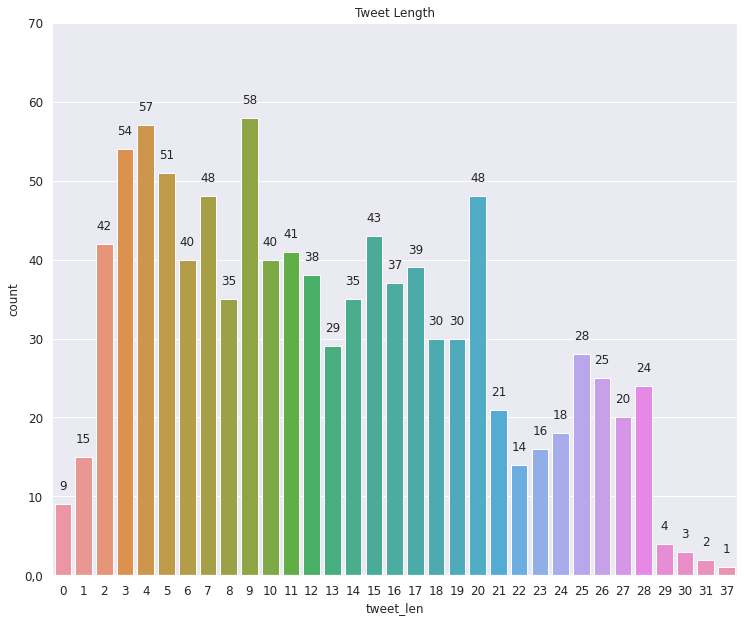

In [56]:
ax = plot2d(plot='countplot',
            df=df_cleaning,
            x='tweet_len',
            y=None,
            Nx=1,
            Ny=1,
            figsize=[12,10],
            fontsize=12,
            sep={'.L':numerical},
            ytext='h',
            title='Tweet Length'
            )

In [57]:
df_cleaning[df_cleaning['tweet_len']<2]

,date,tweet,sentiment,tweet_clean,tweet_len
id,,,,,
1590335754416566273,2022-11-09,@FarthurRosi @IndiHome Bot,1.0,bot,1
1590323503819272192,2022-11-09,@IndiHome WHY?!?!?!? https://t.co/LmJdolERMJ,0.0,why,1
1590313400869220353,2022-11-09,@apurigakuto @IndiHome Ckck terlalu 🤦🏻‍♂️,0.0,ckck,1
1590297849837006850,2022-11-09,#googlepay #indihome #rounnd2 https://t.co/fMV7qpbw9t,1.0,,0
1590291231623741441,2022-11-09,@KwanBuah @IndiHome min,1.0,min,1
1590284389530800128,2022-11-09,@RuangLucuuu Indihome 1 bulan,0.0,indihome,1
1590248979329347584,2022-11-09,Hari terakhir nih!! #INDIBekalSehat #BentoChallenge #AktivitasTanpaBatas #IndiHome https://t.co/1VcuAeMmLK,1.0,nih,1
1590248475270447105,2022-11-09,Ada apa dengan #indihome ?,1.0,,0
1590246835679297536,2022-11-09,@YustiawanIhsan2 @strike_bravo_b @attarimai @noire172 @Kopi_laut @xopch @haryo_m @evylagi Dikira indihome😭,0.0,indihome,1


Akan didrop tweet_len < 2 karena terlalu singkat dan umumnya tidak bermakna

In [58]:
len(df_cleaning)

995

In [59]:
df_cleaning = df_cleaning[df_cleaning['tweet_len']>=2]

In [60]:
len(df_cleaning)

971

## Train-Test Split

In [61]:
df_cleaning.head()

,date,tweet,sentiment,tweet_clean,tweet_len
id,,,,,
1590337331802050561,2022-11-09,"@IndiHomeCare kak kan saya pake paket indihome wifi doang, mau di upgrade ke yg plus TV yg paket 2P 30 MBPS (internet+TV) itu biaya pemasangannya berapa y?",1.0,kak pakai paket indihome wifi doang upgrade yang plus tv yang paket p mbps internettv biaya pemasangannya ya,18
1590337215426490369,2022-11-09,"@bowlbasawr Halo, Sobat. Caranya bisa melalui kami, boleh disampaikan alasan berhenti berlangganan karena apa? Selain itu bisa infokan juga data-data berikut: 1. Nomor IndiHome 2. Atas nama pemilik IndiHome 3. Alamat lengkap (beserta patokan lokasi/ ancer-ancer) 4. Nama pemohon",1.0,halo sobat alasan berhenti berlangganan infokan datadata nomor indihome nama pemilik indihome alamat lengkap beserta patokan lokasi ancerancer nama pemohon,20
1590337197223604226,2022-11-09,Nonton Manchester United ada Ronaldo. Main sendiri tanpa kesebelasan. Ayo tambah layanan indihome~nya selagi ada promo. Sebelum waktu promo kehabisan🫶🏻 #AktivitasTanpaBatas #InternetnyaIndonesia #PantunKalsel https://t.co/X61Khra5H7,1.0,menonton manchester united ronaldo main kesebelasan ayo layanan indihomenya selagi promo promo kehabisan,13
1590337009247473664,2022-11-09,Biar tampilannya full mending Pake laptop dl cek2 barang pesanan &amp; paketku.. untung sdh pake Indihome jg jd bisa maksimal koneksinya.👍 https://t.co/FCopyFPfn5,2.0,biar tampilannya full mending pakai laptop dulu barang pesanan amp paketku untung sudah pakai indihome juga jadi maksimal koneksinya,19
1590336841076846598,2022-11-09,"Nonton mukbang nasi padang pake internet IndiHome bikin laperrr, apalagi yang di makan menu favorit ku banget rendang jadi ngilerr😋",2.0,menonton mukbang nasi padang pakai internet indihome bikin laperrr makan menu favorit ku banget rendang ngilerr,16


In [62]:
X = df_cleaning['tweet_clean'].values
y = df_cleaning['sentiment'].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [64]:
print(f"TRAINING DATA: {X_train.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 873
TESTING DATA: 98


## Encoding

### One Hot Encoding

In [65]:
ohe = preprocessing.OneHotEncoder()
ohe_encoder = ohe.fit(np.array(y_train).reshape(-1, 1))
joblib.dump(ohe_encoder, MODEL_PATH + "ohe_encoder.save")

['/content/drive/MyDrive/Dev Winner TSDN 2022/Sentiment/models/ohe_encoder.save']

In [66]:
ohe_encoder = joblib.load(MODEL_PATH + "ohe_encoder.save")

In [67]:
ohe_encoder.get_feature_names()

array(['x0_0.0', 'x0_1.0', 'x0_2.0'], dtype=object)

In [68]:
y_train = ohe_encoder.transform(np.array(y_train).reshape(-1, 1)).toarray()

In [69]:
y_test = ohe_encoder.transform(np.array(y_test).reshape(-1, 1)).toarray()

# Modeling

## BERT

In [170]:
tokenizer = BertTokenizerFast.from_pretrained('indolem/indobert-base-uncased')

In [171]:
MAX_LEN = 128

In [172]:
def tokenize(data, max_len=MAX_LEN):
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids), np.array(attention_masks)

In [173]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [174]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3),
    tf.keras.callbacks.ModelCheckpoint(MODEL_PATH + 'model_IndoBERT.hdf5', monitor='val_categorical_accuracy', mode='max', verbose=1, save_weights_only=False, save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', verbose=1, patience=6,  mode='max')
]

In [175]:
def IndoBERT(bert_model, max_len=MAX_LEN):
    # Architecture
    input_ids = tf.keras.Input(shape=(max_len), dtype='int32')    
    attention_masks = tf.keras.Input(shape=(max_len), dtype='int32')
    embeddings = bert_model([input_ids, attention_masks])[1]    
    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)
    # Compiling
    model = tf.keras.models.Model(inputs = [input_ids, attention_masks], outputs = output)
    # opt = tf.keras.optimizers.Adam(lr=1e-5, decay=1e-7)
    # opt = tensorflow_addons.optimizers.LazyAdam()
    optimizer = tensorflow_addons.optimizers.NovoGrad()
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()
    model.compile(optimizer=optimizer, loss=loss, metrics=accuracy)
    return model

In [176]:
bert_model = TFBertModel.from_pretrained('indolem/indobert-base-uncased', from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predict

In [177]:
model = IndoBERT(bert_model, MAX_LEN)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 128)]        0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model_12 (TFBertModel)  TFBaseModelOutputWi  110558208  ['input_15[0][0]',               
                                thPoolingAndCrossAt               'input_16[0][0]']               
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

In [178]:
history_bert = model.fit([train_input_ids, train_attention_masks], y_train, 
                         validation_data=([test_input_ids, test_attention_masks], y_test), 
                         callbacks=callbacks,
                         epochs=100, 
                         batch_size=32)

Epoch 1/100
28/28 [==============================] - ETA: 0s - loss: 1.0918 - categorical_accuracy: 0.4227
Epoch 1: val_categorical_accuracy improved from -inf to 0.54082, saving model to /content/drive/MyDrive/Dev Winner TSDN 2022/Sentiment/models/model_IndoBERT.hdf5
28/28 [==============================] - 81s 1s/step - loss: 1.0918 - categorical_accuracy: 0.4227 - val_loss: 0.9402 - val_categorical_accuracy: 0.5408 - lr: 0.0010
Epoch 2/100
28/28 [==============================] - ETA: 0s - loss: 0.9868 - categorical_accuracy: 0.5372
Epoch 2: val_categorical_accuracy improved from 0.54082 to 0.58163, saving model to /content/drive/MyDrive/Dev Winner TSDN 2022/Sentiment/models/model_IndoBERT.hdf5
28/28 [==============================] - 32s 1s/step - loss: 0.9868 - categorical_accuracy: 0.5372 - val_loss: 0.8773 - val_categorical_accuracy: 0.5816 - lr: 0.0010
Epoch 3/100
28/28 [==============================] - ETA: 0s - loss: 0.9179 - categorical_accuracy: 0.5682
Epoch 3: val_categor

In [181]:
model = tf.keras.models.load_model(MODEL_PATH + 'model_IndoBERT.hdf5', custom_objects={'TFBertModel':TFBertModel}, compile=False)

In [182]:
result_bert = model.predict([test_input_ids, test_attention_masks])

4/4 [==============================] - 4s 196ms/step


In [183]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [184]:
# Untuk Microservice
# result_bert = model.predict([test_input_ids, test_attention_masks])
# y_pred_bert =  np.zeros_like(result_bert)
# y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1
# ohe_encoder = joblib.load(MODEL_PATH + "ohe_encoder.save")
# df['sentiment_prediction'] = ohe_encoder.inverse_transform(y_pred_bert)

In [185]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negatif', 'Netral', 'Positif']
    ax=gs.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

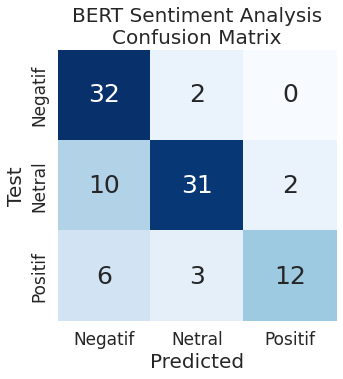

In [186]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')

In [187]:
print('\tClassification Report for BERT:\n\n', classification_report(y_test,y_pred_bert, target_names=['Negatif', 'Netral', 'Positif']))

	Classification Report for BERT:

               precision    recall  f1-score   support

     Negatif       0.67      0.94      0.78        34
      Netral       0.86      0.72      0.78        43
     Positif       0.86      0.57      0.69        21

   micro avg       0.77      0.77      0.77        98
   macro avg       0.79      0.74      0.75        98
weighted avg       0.79      0.77      0.76        98
 samples avg       0.77      0.77      0.77        98



# Pipeline Predict

In [ ]:
!pip install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip install aiohttp==3.7.0
!pip install nest_asyncio

In [1]:
!cp '/content/drive/MyDrive/Dev Winner TSDN 2022/Sentiment/modules/twitter_scrapper.py' .

In [ ]:
!pip install tweet-preprocessor
!pip install transformers
!pip install joblib
!pip install grplot

In [30]:
from twitter_scrapper import collector
import numpy as np
import pandas as pd
import re, string
import preprocessor as p
from transformers import BertTokenizerFast
from transformers import TFBertModel
import tensorflow as tf
import joblib

In [41]:
from grplot import plot2d, analytic
import grplot_seaborn as gs
gs.set_theme(context='notebook', style='darkgrid', palette='deep')
import matplotlib
matplotlib.rcParams['axes.formatter.limits'] = [-5,18]
import matplotlib.pyplot as plt
numerical = ['Count', 'count', 'Frequency', 'Probability', 'Proportion', 'Percent', 'Density']

In [4]:
BASE_PATH = "/content/drive/MyDrive/Dev Winner TSDN 2022/Sentiment/"
IMAGE_PATH = BASE_PATH + "images/"
DATA_PATH = BASE_PATH + "data/"
MODEL_PATH = BASE_PATH + "models/"
MODULE_PATH = BASE_PATH + "modules/"

In [6]:
keywords = "indihome"
starting_date = None # "2022-01-1 00:00:00"
output_filename = "indihome_predict.csv"
limit = 1000
lang='en'
user = None
format = output_filename[-3:]
collector(keywords, output_filename, starting_date, limit=limit, lang=lang, user=user, format=format)

1592222698087686144 2022-11-14 18:27:27 +0000 <IndiHomeCare> @__iMam Hai, Kak Imam. Informasi, permintaan dan laporan seputar layanan IndiHome bisa sampaikan detailnya ke DM akun kami @IndiHomeCare ( https://t.co/yuUDRsBgiA) supaya bisa dibantu lebih lanjut. -Ayunk
1592222588897751042 2022-11-14 18:27:01 +0000 <jayakatwan9> IndiHome Anjeng
1592222479916748801 2022-11-14 18:26:35 +0000 <IndiHomeCare> @Hanifalfares Hai, Kak Hanifal. Ada apa nih dgn layanan IndiHome nya, Kak? Yuk infoin detail laporannya via DM  https://t.co/yuUDRsBgiA serta nomor internet dan nomor ponselnya ya, Kak. Terima kasih. -Adhan
1592222266380939264 2022-11-14 18:25:45 +0000 <IndiHomeCare> @aisanotsubuyaki Hai, Kak Aisah. Ada apa nih dgn layanan IndiHome nya, Kak? Yuk infoin detail laporannya via DM  https://t.co/yuUDRsTpwI serta nomor internet dan nomor ponselnya ya, Kak. Terima kasih. -Adhan
1592222214753226753 2022-11-14 18:25:32 +0000 <DreaminBoutUu> no internet dah mau 1 jam @IndiHomeCare @IndiHome
159222214

In [7]:
!mv '/content/indihome_predict.csv' '/content/drive/MyDrive/Dev Winner TSDN 2022/Sentiment/data'

In [19]:
df = pd.read_csv(DATA_PATH + "indihome_predict.csv", parse_dates=['date'], index_col=0) 
df.head()

,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
id,,,,,,,,,,,,,,,,,,,,,
1592222698087686144,1592219090940465153,2022-11-14 18:27:27 UTC,2022-11-14,18:27:27,0,765035200896118789,indihomecare,IndiHomeCare,NaN,"@__iMam Hai, Kak Imam. Informasi, permintaan d...",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '__iMam', 'name': 'Imam Budi ...",NaN,NaN,NaN,NaN
1592222588897751042,1592222588897751042,2022-11-14 18:27:01 UTC,2022-11-14,18:27:01,0,869845994824843265,jayakatwan9,pew,NaN,IndiHome Anjeng,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1592222479916748801,1592208867819417601,2022-11-14 18:26:35 UTC,2022-11-14,18:26:35,0,765035200896118789,indihomecare,IndiHomeCare,NaN,"@Hanifalfares Hai, Kak Hanifal. Ada apa nih dg...",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Hanifalfares', 'name': 'Curi...",NaN,NaN,NaN,NaN
1592222266380939264,1592207551709708289,2022-11-14 18:25:45 UTC,2022-11-14,18:25:45,0,765035200896118789,indihomecare,IndiHomeCare,NaN,"@aisanotsubuyaki Hai, Kak Aisah. Ada apa nih d...",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'aisanotsubuyaki', 'name': 'a...",NaN,NaN,NaN,NaN
1592222214753226753,1592222214753226753,2022-11-14 18:25:32 UTC,2022-11-14,18:25:32,0,1361627457791533056,dreaminboutuu,MHA,NaN,no internet dah mau 1 jam @IndiHomeCare @IndiHome,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [20]:
def preprocess_tweet(text):
    return p.clean(text)

stop_words = open(DATA_PATH + "stopword.txt", "r").read().split()

def clean_text(text, stopwords):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = str(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\r', ' ', text)
    text = ' '.join([word for word in text.split() if word.lower() not in stopwords])
    return text

dic = pd.read_csv(DATA_PATH + "normalize_word.csv")

def normalize(text):
    text = text.split()
    for val in dic.itertuples(index=False):
        text = [w.replace(val.slang, val.formal) if w == val.slang else w for w in text]
    return " ".join(text)

In [21]:
df['tweet_clean'] = df['tweet'].apply(preprocess_tweet)

In [22]:
df['tweet_clean'] = df['tweet_clean'].apply(clean_text, stopwords=stop_words)

In [23]:
df['tweet_clean'] = df['tweet_clean'].apply(normalize)

In [24]:
ohe_encoder = joblib.load(MODEL_PATH + "ohe_encoder.save")

In [25]:
tokenizer = BertTokenizerFast.from_pretrained('indolem/indobert-base-uncased')

In [26]:
MAX_LEN = 128

In [27]:
def tokenize(data, max_len=MAX_LEN):
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids), np.array(attention_masks)

In [28]:
X_test = df['tweet_clean'].values

In [31]:
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [32]:
model = tf.keras.models.load_model(MODEL_PATH + 'model_IndoBERT.hdf5', custom_objects={'TFBertModel':TFBertModel}, compile=False)

In [33]:
result_bert = model.predict([test_input_ids, test_attention_masks])

32/32 [==============================] - 12s 261ms/step


In [34]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [35]:
ohe_encoder = joblib.load(MODEL_PATH + "ohe_encoder.save")

In [36]:
df['sentiment_prediction'] = ohe_encoder.inverse_transform(y_pred_bert)

In [43]:
df['sentiment_prediction'] = df['sentiment_prediction'].map({0:'Negatif', 1:'Netral', 2:'Positif'})

In [44]:
df.head()

,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tweet_clean,sentiment_prediction
id,,,,,,,,,,,,,,,,,,,,,
1592222698087686144,1592219090940465153,2022-11-14 18:27:27 UTC,2022-11-14,18:27:27,0,765035200896118789,indihomecare,IndiHomeCare,NaN,"@__iMam Hai, Kak Imam. Informasi, permintaan d...",...,NaN,NaN,NaN,"[{'screen_name': '__iMam', 'name': 'Imam Budi ...",NaN,NaN,NaN,NaN,hai kak imam informasi permintaan laporan sepu...,Netral
1592222588897751042,1592222588897751042,2022-11-14 18:27:01 UTC,2022-11-14,18:27:01,0,869845994824843265,jayakatwan9,pew,NaN,IndiHome Anjeng,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,indihome anjeng,Negatif
1592222479916748801,1592208867819417601,2022-11-14 18:26:35 UTC,2022-11-14,18:26:35,0,765035200896118789,indihomecare,IndiHomeCare,NaN,"@Hanifalfares Hai, Kak Hanifal. Ada apa nih dg...",...,NaN,NaN,NaN,"[{'screen_name': 'Hanifalfares', 'name': 'Curi...",NaN,NaN,NaN,NaN,hai kak hanifal nih dengan layanan indihome ny...,Netral
1592222266380939264,1592207551709708289,2022-11-14 18:25:45 UTC,2022-11-14,18:25:45,0,765035200896118789,indihomecare,IndiHomeCare,NaN,"@aisanotsubuyaki Hai, Kak Aisah. Ada apa nih d...",...,NaN,NaN,NaN,"[{'screen_name': 'aisanotsubuyaki', 'name': 'a...",NaN,NaN,NaN,NaN,hai kak aisah nih dengan layanan indihome nya ...,Netral
1592222214753226753,1592222214753226753,2022-11-14 18:25:32 UTC,2022-11-14,18:25:32,0,1361627457791533056,dreaminboutuu,MHA,NaN,no internet dah mau 1 jam @IndiHomeCare @IndiHome,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,nomor internet deh jam,Negatif


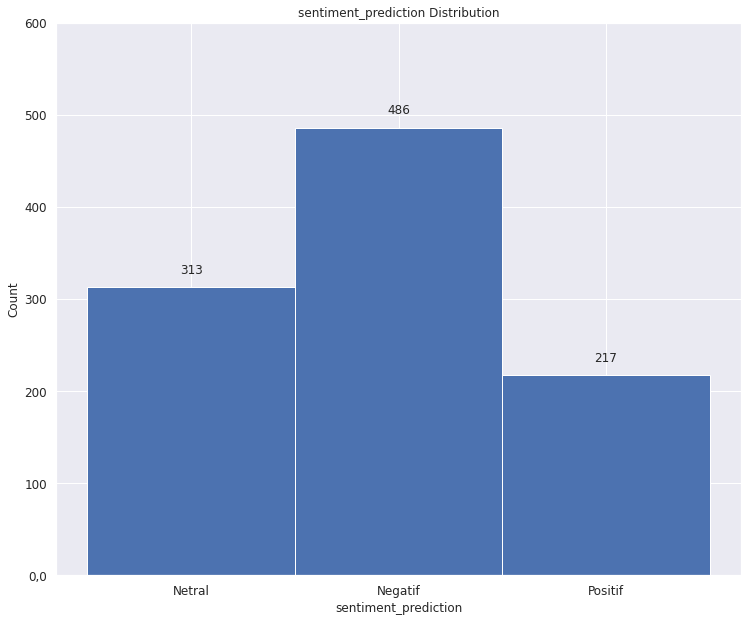

In [45]:
ax = plot2d(plot='histplot',
            df=df,
            x='sentiment_prediction',
            y=None,
            Nx=1,
            Ny=1,
            figsize=[12,10],
            fontsize=12,
            sep={'.L':numerical},
            ytext='h',
            title='sentiment_prediction Distribution'
            )